In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Data\\2019Custom\\2019_JUNE_SEA_GameStats.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Home,Away,JUNE,Home_Win?,Home_Win,Home_Loss,Away_Win,Away_Loss,Home_Win_Percentage,Home_Win_Streak,Home_Batting_Average,Home_On_Base_Percentage,Home_Slugging_Percentage,Home_ERA_Start,Away_Win_Percentage,Away_Win_Streak,Away_Batting_Average,Away_On_Base_Percentage,Away_Slugging_Percentage,Away_ERA_Start
1,SEA,LAA,1,0,25,35,28,30,0.416666667,1,0.2436,0.3203,0.4364,3.6,0.482758621,-1,0.290888889,0.374111111,0.506777778,4.09
2,SEA,LAA,2,0,25,36,29,30,0.409836066,-1,0.223090909,0.305545455,0.399909091,4.89,0.491525424,1,0.286,0.383272727,0.472909091,4.76
3,SEA,HOU,3,0,25,37,40,20,0.403225806,-2,0.236777778,0.332666667,0.425111111,4.24,0.666666667,3,0.246777778,0.319888889,0.402888889,5.59
4,SEA,HOU,4,0,25,38,41,20,0.396825397,-3,0.219090909,0.302636364,0.393090909,7.71,0.672131148,4,0.257545455,0.329454545,0.419818182,3.39


In [23]:
X = df.loc[1:,8:].values
y = df.loc[1:,3:3].values.ravel()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#Trees don't need to be scaled...
#scaler = StandardScaler()
#X_transform = scaler.fit_transform(X)
le = LabelEncoder()
y_label = le.fit_transform(y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y_label, 
                     test_size=0.10,
                     stratify=y_label,
                     random_state=1)

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=10, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
tree_model.score(X_test,y_test)

0.3333333333333333

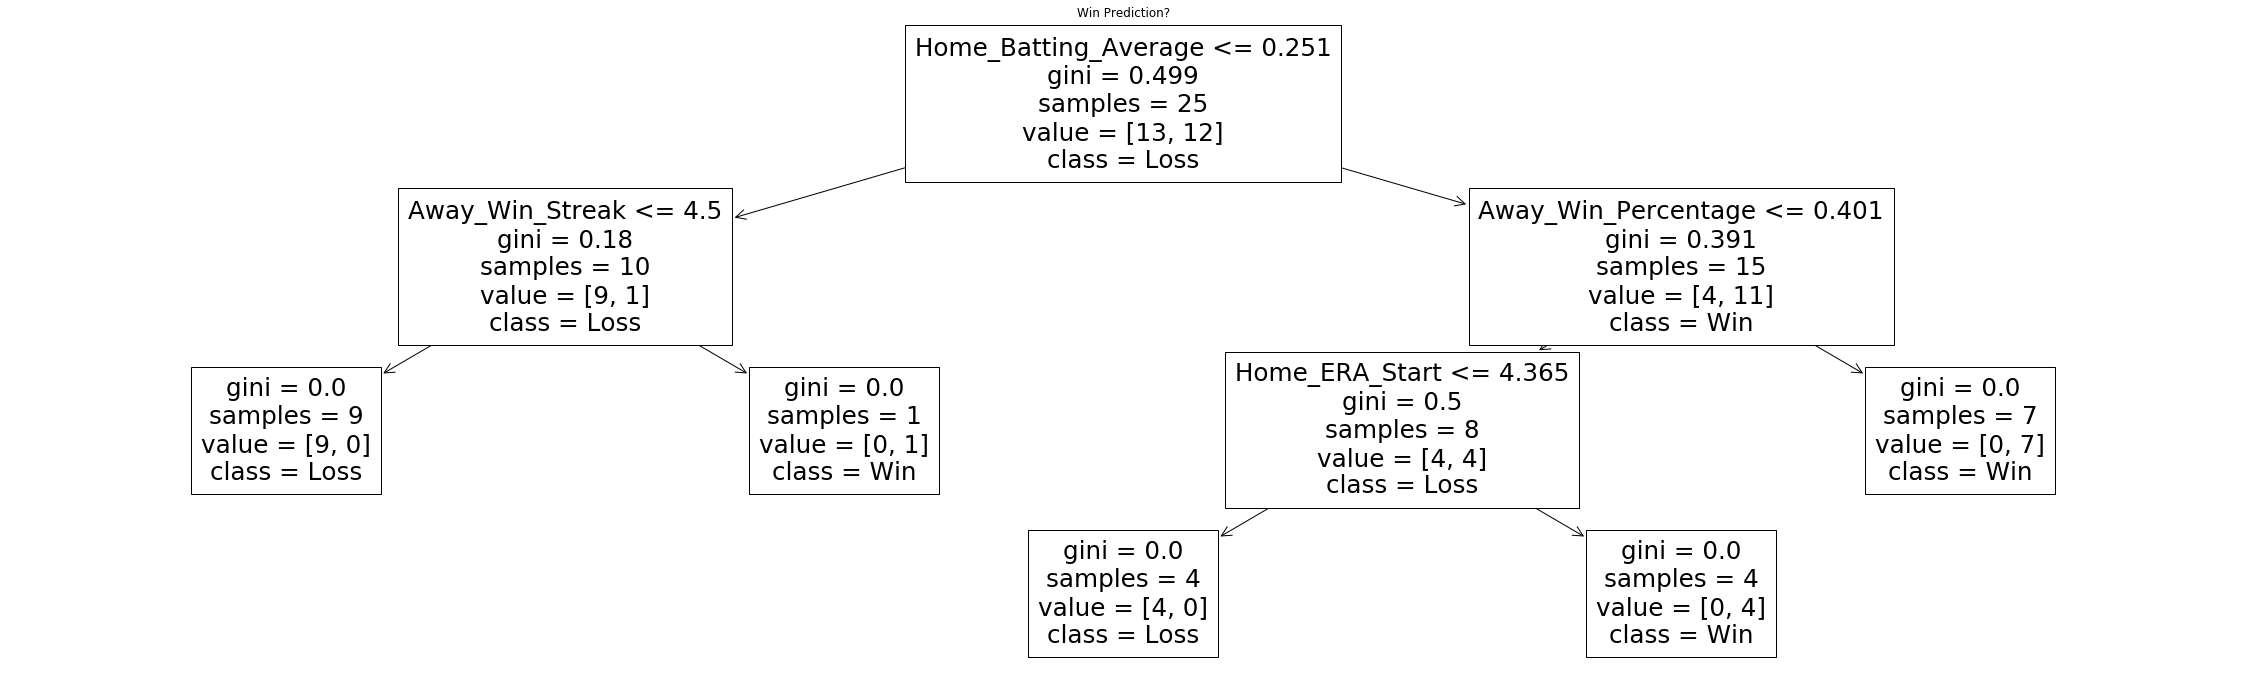

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40,12))
tree.plot_tree(tree_model, feature_names=df.loc[0:0,8:].values.ravel(), class_names = ["Loss", "Win"])
#plt.savefig('gini_depth_7.pdf')
plt.title("Win Prediction?")
plt.show()

Depending on the random_state I use, different trees are created.  All them seem to overfit, for example with a random state of 1 I get a node that checks for away teams with 5 or more wins (something that happens only once in the data.  It suggested that if it didn't have more than 5 wins then the home team would lose... which makes no sense.  It was just a random data point without real meaning.

In [19]:
df.loc[0:0,8:].values.ravel()

array(['Home_Win_Percentage', 'Home_Win_Streak', 'Home_Batting_Average',
       'Home_On_Base_Percentage', 'Home_Slugging_Percentage',
       'Home_ERA_Start', 'Away_Win_Percentage', 'Away_Win_Streak',
       'Away_Batting_Average', 'Away_On_Base_Percentage',
       'Away_Slugging_Percentage', 'Away_ERA_Start'], dtype=object)